In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import pickle
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
parents_5p = pd.read_csv('table_parents_5p.csv', header=None)
parents_header = pd.read_csv('table_parents_header.csv')
parents_5p.columns = parents_header.columns
parents_5p.head()

,mnap_id,parent_id,area,border_length,avg_twin_area,total_twin_area,no_twins,avg_twin_thk
0,1,20,29.79127,47.2,1.108513,1.108513,1,0.548710
1,1,22,70.00950,72.4,4.295486,8.590972,2,1.319663
2,1,27,221.56390,148.0,1.247077,1.247077,1,0.559899
3,2,28,189.79810,230.0,34.398530,34.398530,1,6.311328
4,0,29,53.27788,72.8,9.214511,9.214511,1,1.303507


In [ ]:
parents_5p.shape

(688, 8)

In [ ]:
parents_5p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mnap_id          688 non-null    int64  
 1   parent_id        688 non-null    int64  
 2   area             688 non-null    float64
 3   border_length    688 non-null    float64
 4   avg_twin_area    688 non-null    float64
 5   total_twin_area  688 non-null    float64
 6   no_twins         688 non-null    int64  
 7   avg_twin_thk     688 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 43.1 KB


In [ ]:
parents_5p.isnull().sum()

mnap_id            0
parent_id          0
area               0
border_length      0
avg_twin_area      0
total_twin_area    0
no_twins           0
avg_twin_thk       0
dtype: int64

In [ ]:
parents_5p = parents_5p.drop(columns = ['border_length', 'avg_twin_area', 'total_twin_area'])
parents_5p.columns = ['map_id', 'grain_id', 'area', 'no_twins', 'avg_twin_thk']
parents_5p.head()

,map_id,grain_id,area,no_twins,avg_twin_thk
0,1,20,29.79127,1,0.548710
1,1,22,70.00950,2,1.319663
2,1,27,221.56390,1,0.559899
3,2,28,189.79810,1,6.311328
4,0,29,53.27788,1,1.303507


In [ ]:
grains_5p = pd.read_csv("table_grains_5p.csv", header=None)
grains_header = pd.read_csv("table_grains_header.csv")
grains_5p.columns = grains_header.columns
grains_5p.head()

,map_id,grain_id,area,qx,qy,qz,qw
0,0,12,29.618070,-0.057401,0.179354,-0.164781,0.968186
1,1,14,13.406070,-0.121249,0.177339,0.044571,0.975635
2,1,15,0.554256,0.199231,0.043160,-0.123549,0.971175
3,1,18,27.123920,0.027968,0.040752,0.158807,0.986072
4,2,18,185.745100,-0.341197,0.172846,0.122750,0.915774


In [ ]:
grains_5p.shape

(3989, 7)

In [ ]:
grains_5p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   map_id    3989 non-null   int64  
 1   grain_id  3989 non-null   int64  
 2   area      3989 non-null   float64
 3   qx        3989 non-null   float64
 4   qy        3989 non-null   float64
 5   qz        3989 non-null   float64
 6   qw        3989 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 218.3 KB


In [ ]:
grains_5p.isnull().sum()

map_id      0
grain_id    0
area        0
qx          0
qy          0
qz          0
qw          0
dtype: int64

In [ ]:
grains_5p = grains_5p.drop(columns = [ 'qx', 'qy', 'qz', 'qw'])
grains_5p.head()

,map_id,grain_id,area
0,0,12,29.618070
1,1,14,13.406070
2,1,15,0.554256
3,1,18,27.123920
4,2,18,185.745100


In [ ]:
gp_5p = pd.merge(grains_5p, parents_5p, how='outer', on=["map_id","grain_id","area"])
gp_5p.head()

,map_id,grain_id,area,no_twins,avg_twin_thk
0,0,12,29.618070,NaN,NaN
1,1,14,13.406070,NaN,NaN
2,1,15,0.554256,NaN,NaN
3,1,18,27.123920,NaN,NaN
4,2,18,185.745100,NaN,NaN


In [ ]:
gp_5p.shape

(3989, 5)

In [ ]:
gp_5p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   map_id        3989 non-null   int64  
 1   grain_id      3989 non-null   int64  
 2   area          3989 non-null   float64
 3   no_twins      688 non-null    float64
 4   avg_twin_thk  688 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 155.9 KB


In [ ]:
gp_5p.isnull().sum()

map_id             0
grain_id           0
area               0
no_twins        3301
avg_twin_thk    3301
dtype: int64

In [ ]:
gp_5p.fillna(0, inplace=True)

In [ ]:
gp_5p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   map_id        3989 non-null   int64  
 1   grain_id      3989 non-null   int64  
 2   area          3989 non-null   float64
 3   no_twins      3989 non-null   float64
 4   avg_twin_thk  3989 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 155.9 KB


In [ ]:
gp_5p['twin_flag'] = gp_5p['no_twins'].apply(lambda x: 1 if x > 0 else 0)
gp_5p = gp_5p.drop(columns=['no_twins',	'avg_twin_thk'])
gp_5p.head()

,map_id,grain_id,area,twin_flag
0,0,12,29.618070,0
1,1,14,13.406070,0
2,1,15,0.554256,0
3,1,18,27.123920,0
4,2,18,185.745100,0


In [ ]:
parents_10p = pd.read_csv('table_parents_10p.csv', header=None)
parents_10p.columns = parents_header.columns
parents_10p.head()

,mnap_id,parent_id,area,border_length,avg_twin_area,total_twin_area,no_twins,avg_twin_thk
0,3,9,105.724400,128.8,3.949076,7.898152,2,1.307242
1,3,11,1307.733000,348.8,0.987269,1.974538,2,0.327943
2,4,21,5.230794,20.4,1.143154,2.286308,2,0.612170
3,1,23,2.043820,14.4,0.935307,0.935307,1,0.898466
4,3,25,123.495200,171.2,21.881575,65.644726,3,1.620037


In [ ]:
parents_10p.shape

(1386, 8)

In [ ]:
parents_10p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mnap_id          1386 non-null   int64  
 1   parent_id        1386 non-null   int64  
 2   area             1386 non-null   float64
 3   border_length    1386 non-null   float64
 4   avg_twin_area    1386 non-null   float64
 5   total_twin_area  1386 non-null   float64
 6   no_twins         1386 non-null   int64  
 7   avg_twin_thk     1386 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 86.8 KB


In [ ]:
parents_10p.isnull().sum()

mnap_id            0
parent_id          0
area               0
border_length      0
avg_twin_area      0
total_twin_area    0
no_twins           0
avg_twin_thk       0
dtype: int64

In [ ]:
parents_10p = parents_10p.drop(columns = ['border_length', 'avg_twin_area', 'total_twin_area'])
parents_10p.columns = ['map_id', 'grain_id', 'area', 'no_twins', 'avg_twin_thk']
parents_10p.head()

,map_id,grain_id,area,no_twins,avg_twin_thk
0,3,9,105.724400,2,1.307242
1,3,11,1307.733000,2,0.327943
2,4,21,5.230794,2,0.612170
3,1,23,2.043820,1,0.898466
4,3,25,123.495200,3,1.620037


In [ ]:
grains_10p = pd.read_csv("table_grains_10p.csv", header=None)
grains_header = pd.read_csv("table_grains_header.csv")
grains_10p.columns = grains_header.columns
grains_10p.head()

,map_id,grain_id,area,qx,qy,qz,qw
0,3,9,105.724400,0.009483,0.309544,-0.127037,0.942313
1,3,10,0.450333,-0.071370,0.342663,0.083039,0.933056
2,3,11,1307.733000,0.021250,-0.221198,-0.202887,0.953655
3,3,12,2.840563,0.214735,0.054440,0.207408,0.952842
4,3,13,14.064250,0.056107,0.287164,-0.228068,0.928641


In [ ]:
grains_10p.shape

(4678, 7)

In [ ]:
grains_10p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4678 entries, 0 to 4677
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   map_id    4678 non-null   int64  
 1   grain_id  4678 non-null   int64  
 2   area      4678 non-null   float64
 3   qx        4678 non-null   float64
 4   qy        4678 non-null   float64
 5   qz        4678 non-null   float64
 6   qw        4678 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 256.0 KB


In [ ]:
grains_10p.isnull().sum()

map_id      0
grain_id    0
area        0
qx          0
qy          0
qz          0
qw          0
dtype: int64

In [ ]:
grains_10p = grains_10p.drop(columns = [ 'qx', 'qy', 'qz', 'qw'])
grains_10p.head()

,map_id,grain_id,area
0,3,9,105.724400
1,3,10,0.450333
2,3,11,1307.733000
3,3,12,2.840563
4,3,13,14.064250


In [ ]:
gp_10p = pd.merge(grains_10p, parents_10p, how='outer', on=["map_id","grain_id","area"])
gp_10p.head()

,map_id,grain_id,area,no_twins,avg_twin_thk
0,3,9,105.724400,2.0,1.307242
1,3,10,0.450333,NaN,NaN
2,3,11,1307.733000,2.0,0.327943
3,3,12,2.840563,NaN,NaN
4,3,13,14.064250,NaN,NaN


In [ ]:
gp_10p.shape

(4678, 5)

In [ ]:
gp_10p.isnull().sum()

map_id             0
grain_id           0
area               0
no_twins        3292
avg_twin_thk    3292
dtype: int64

In [ ]:
gp_10p.fillna(0, inplace=True)

In [ ]:
gp_10p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4678 entries, 0 to 4677
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   map_id        4678 non-null   int64  
 1   grain_id      4678 non-null   int64  
 2   area          4678 non-null   float64
 3   no_twins      4678 non-null   float64
 4   avg_twin_thk  4678 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 182.9 KB


In [ ]:
gp_10p.isnull().sum()

map_id          0
grain_id        0
area            0
no_twins        0
avg_twin_thk    0
dtype: int64

In [ ]:
gp_10p['twin_flag'] = gp_10p['no_twins'].apply(lambda x: 1 if x > 0 else 0)
gp_10p = gp_10p.drop(columns=['no_twins',	'avg_twin_thk'])
gp_10p.head()

,map_id,grain_id,area,twin_flag
0,3,9,105.724400,1
1,3,10,0.450333,0
2,3,11,1307.733000,1
3,3,12,2.840563,0
4,3,13,14.064250,0


In [ ]:
bin_size1 = 20

bins1 = np.arange(0,  max(gp_5p['area'])+ bin_size1, bin_size1)

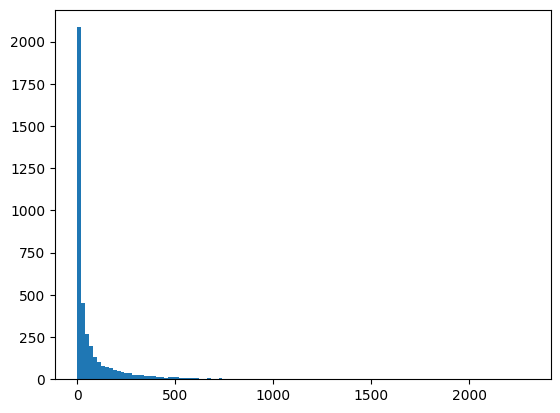

In [ ]:
plt.hist(gp_5p['area'], bins=bins1)
plt.savefig('one.png')

In [ ]:
bin_size2 = 20

bins2 = np.arange(0,  max(gp_10p['area'])+ bin_size2, bin_size2)

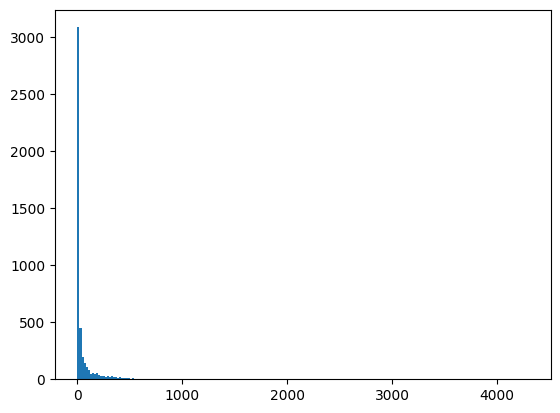

In [ ]:
plt.hist(gp_10p['area'], bins=bins2)
plt.savefig('two.png')

In [ ]:
bin_size3 = 20

bins3 = np.arange(0,  600+ bin_size3, bin_size3)

gp_5pco = parents_5p.groupby(pd.cut(parents_5p['area'], bins=bins3, right=False)).agg(
    area_mean=('area', 'mean'),
    avg_no_twins=('no_twins', 'mean'),
    avg_twin_thk=('avg_twin_thk', 'mean')
).reset_index()
gp_5pco['area_mean'] = gp_5pco['area'].apply(lambda x: (x.left + x.right) / 2)
gp_5pco['area_mean'] = gp_5pco['area_mean'].astype(float)
gp_5pcop = gp_5pco.drop(columns=['area'])
print(gp_5pcop.to_string())


    area_mean  avg_no_twins  avg_twin_thk
0        10.0      1.301205      0.945904
1        30.0      1.354839      1.080275
2        50.0      1.279070      1.236518
3        70.0      1.268293      1.012059
4        90.0      1.348837      1.542151
5       110.0      1.250000      1.719219
6       130.0      1.416667      1.626425
7       150.0      1.500000      1.991175
8       170.0      1.846154      1.876265
9       190.0      1.217391      1.975904
10      210.0      1.240000      1.285237
11      230.0      1.347826      1.502120
12      250.0      1.333333      2.013763
13      270.0      1.235294      1.836644
14      290.0      1.461538      2.144926
15      310.0      1.166667      2.231530
16      330.0      1.187500      1.823392
17      350.0      1.400000      1.386481
18      370.0      1.333333      1.320148
19      390.0      1.555556      2.151347
20      410.0      1.833333      1.555214
21      430.0      1.700000      2.383583
22      450.0      2.333333      2

In [ ]:
bin_size3 = 20

bins3 = np.arange(0,  600+ bin_size3, bin_size3)

gp_5pco = gp_5p.groupby(pd.cut(gp_5p['area'], bins=bins3, right=False)).agg(
frac_grains=('twin_flag', lambda x: x.sum() / len(x))
).reset_index()
gp_5pco['area_mean'] = gp_5pco['area'].apply(lambda x: (x.left + x.right) / 2)
gp_5pco['area_mean'] = gp_5pco['area_mean'].astype(float)
gp_5pcog = gp_5pco.drop(columns=['area'])
print(gp_5pcog.to_string())

    frac_grains  area_mean
0      0.039808       10.0
1      0.138085       30.0
2      0.160448       50.0
3      0.209184       70.0
4      0.333333       90.0
5      0.198020      110.0
6      0.296296      130.0
7      0.400000      150.0
8      0.406250      170.0
9      0.410714      190.0
10     0.531915      210.0
11     0.560976      230.0
12     0.600000      250.0
13     0.485714      270.0
14     0.481481      290.0
15     0.500000      310.0
16     0.571429      330.0
17     0.500000      350.0
18     0.571429      370.0
19     0.500000      390.0
20     0.400000      410.0
21     0.625000      430.0
22     0.600000      450.0
23     0.846154      470.0
24     0.916667      490.0
25     0.272727      510.0
26     1.000000      530.0
27     0.875000      550.0
28     0.666667      570.0
29     0.666667      590.0


In [ ]:
gp_5pco = pd.merge(gp_5pcop, gp_5pcog, how='outer', on=["area_mean"])
gp_5pco.dropna(inplace=True)
gp_5pco.reset_index(drop=True, inplace=True)
print(gp_5pco.to_string())

    area_mean  avg_no_twins  avg_twin_thk  frac_grains
0        10.0      1.301205      0.945904     0.039808
1        30.0      1.354839      1.080275     0.138085
2        50.0      1.279070      1.236518     0.160448
3        70.0      1.268293      1.012059     0.209184
4        90.0      1.348837      1.542151     0.333333
5       110.0      1.250000      1.719219     0.198020
6       130.0      1.416667      1.626425     0.296296
7       150.0      1.500000      1.991175     0.400000
8       170.0      1.846154      1.876265     0.406250
9       190.0      1.217391      1.975904     0.410714
10      210.0      1.240000      1.285237     0.531915
11      230.0      1.347826      1.502120     0.560976
12      250.0      1.333333      2.013763     0.600000
13      270.0      1.235294      1.836644     0.485714
14      290.0      1.461538      2.144926     0.481481
15      310.0      1.166667      2.231530     0.500000
16      330.0      1.187500      1.823392     0.571429
17      35

In [ ]:
bin_size3 = 20

bins3 = np.arange(0,  600+ bin_size3, bin_size3)

gp_10pco = parents_10p.groupby(pd.cut(parents_10p['area'], bins=bins3, right=False)).agg(
    area_mean=('area', 'mean'),
    avg_no_twins=('no_twins', 'mean'),
    avg_twin_thk=('avg_twin_thk', 'mean')
).reset_index()
gp_10pco['area_mean'] = gp_10pco['area'].apply(lambda x: (x.left + x.right) / 2)
gp_10pco['area_mean'] = gp_10pco['area_mean'].astype(float)
gp_10pcop = gp_10pco.drop(columns=['area'])
print(gp_10pcop.to_string())

    area_mean  avg_no_twins  avg_twin_thk
0        10.0      1.190000      0.940039
1        30.0      1.434783      1.345749
2        50.0      1.522936      1.562562
3        70.0      1.455696      1.678039
4        90.0      1.602941      2.017564
5       110.0      1.553191      1.777880
6       130.0      1.535714      1.357250
7       150.0      1.891892      2.084586
8       170.0      1.717949      1.714383
9       190.0      1.911111      2.197935
10      210.0      1.571429      2.733442
11      230.0      2.388889      2.358191
12      250.0      2.458333      2.612156
13      270.0      1.812500      1.765306
14      290.0      1.545455      2.465086
15      310.0      2.125000      2.551143
16      330.0      1.809524      2.971685
17      350.0      1.692308      2.402489
18      370.0      2.400000      2.049569
19      390.0      2.800000      3.798523
20      410.0      1.818182      1.824429
21      430.0      2.833333      2.981803
22      450.0      3.666667      3

In [ ]:
bin_size3 = 20

bins3 = np.arange(0,  600+ bin_size3, bin_size3)

gp_10pco = gp_10p.groupby(pd.cut(gp_10p['area'], bins=bins3, right=False)).agg(
frac_grains=('twin_flag', lambda x: x.sum() / len(x))
).reset_index()
gp_10pco['area_mean'] = gp_10pco['area'].apply(lambda x: (x.left + x.right) / 2)
gp_10pco['area_mean'] = gp_10pco['area_mean'].astype(float)
gp_10pcog = gp_10pco.drop(columns=['area'])
print(gp_10pcog.to_string())

    frac_grains  area_mean
0      0.129492       10.0
1      0.455947       30.0
2      0.558974       50.0
3      0.568345       70.0
4      0.607143       90.0
5      0.566265      110.0
6      0.583333      130.0
7      0.672727      150.0
8      0.812500      170.0
9      0.818182      190.0
10     0.777778      210.0
11     0.692308      230.0
12     0.800000      250.0
13     0.695652      270.0
14     0.785714      290.0
15     0.842105      310.0
16     0.807692      330.0
17     0.812500      350.0
18     0.937500      370.0
19     0.833333      390.0
20     0.611111      410.0
21     0.666667      430.0
22     1.000000      450.0
23     0.928571      470.0
24     0.636364      490.0
25     1.000000      510.0
26     0.714286      530.0
27     1.000000      550.0
28     1.000000      570.0
29     1.000000      590.0


In [ ]:
gp_10pco = pd.merge(gp_10pcop, gp_10pcog, how='outer', on=["area_mean"])
gp_10pco.dropna(inplace=True)
gp_10pco.reset_index(drop=True, inplace=True)
print(gp_10pco.to_string())

    area_mean  avg_no_twins  avg_twin_thk  frac_grains
0        10.0      1.190000      0.940039     0.129492
1        30.0      1.434783      1.345749     0.455947
2        50.0      1.522936      1.562562     0.558974
3        70.0      1.455696      1.678039     0.568345
4        90.0      1.602941      2.017564     0.607143
5       110.0      1.553191      1.777880     0.566265
6       130.0      1.535714      1.357250     0.583333
7       150.0      1.891892      2.084586     0.672727
8       170.0      1.717949      1.714383     0.812500
9       190.0      1.911111      2.197935     0.818182
10      210.0      1.571429      2.733442     0.777778
11      230.0      2.388889      2.358191     0.692308
12      250.0      2.458333      2.612156     0.800000
13      270.0      1.812500      1.765306     0.695652
14      290.0      1.545455      2.465086     0.785714
15      310.0      2.125000      2.551143     0.842105
16      330.0      1.809524      2.971685     0.807692
17      35

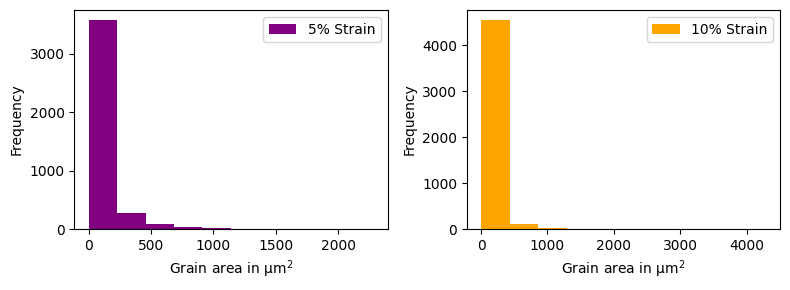

In [334]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.hist(gp_5p['area'], label='5% Strain', color='purple')
plt.legend()
plt.xlabel('Grain area in μm$^2$')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(gp_10p['area'],label='10% Strain', color='orange')
plt.legend()
plt.xlabel('Grain area in μm$^2$')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('three.png')
plt.show()

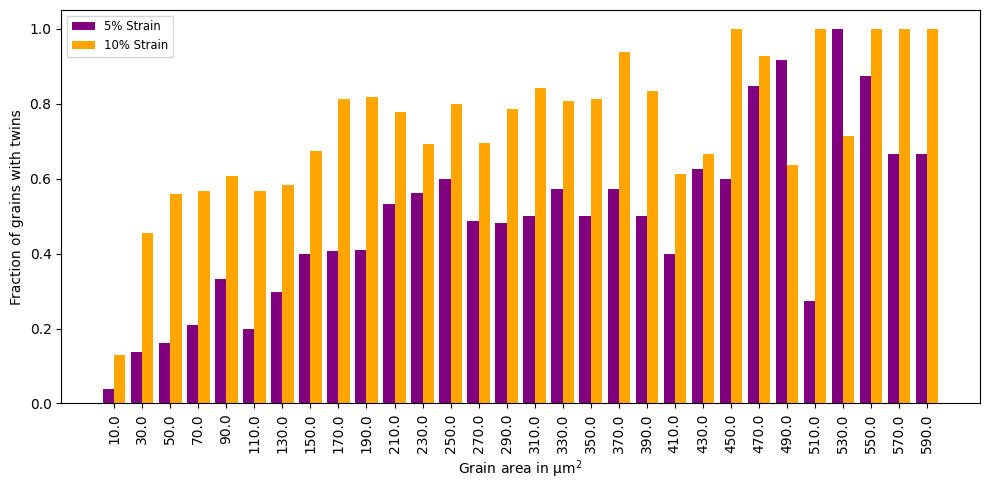

In [335]:
plt.figure(figsize=(10, 5))
X_axis = np.arange(len(gp_5pco['area_mean']))

plt.bar(X_axis - 0.2, gp_5pco['frac_grains'], 0.4, color='purple', label = '5% Strain')
plt.bar(X_axis + 0.2, gp_10pco['frac_grains'], 0.4, color='orange', label = '10% Strain')
plt.legend(fontsize='small', loc='upper left')

plt.xticks(X_axis, gp_5pco['area_mean'], rotation=90 )
plt.xlabel('Grain area in μm$^2$')
plt.ylabel('Fraction of grains with twins')
plt.tight_layout()
plt.savefig('four.png')
plt.show()

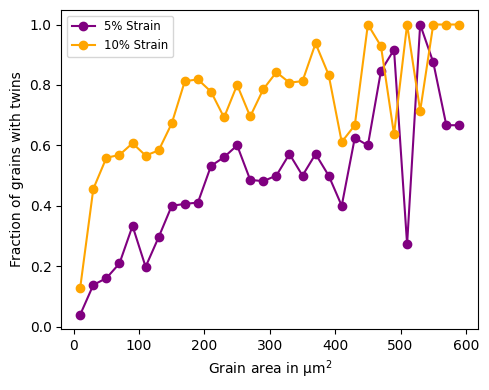

In [336]:
plt.figure(figsize=(5, 4))
plt.plot(gp_5pco['area_mean'], gp_5pco['frac_grains'], marker='o', color='purple', label='5% Strain')
plt.plot(gp_10pco['area_mean'], gp_10pco['frac_grains'], marker='o', color='orange', label='10% Strain')
plt.legend(fontsize='small')
plt.xlabel('Grain area in μm$^2$')
plt.ylabel('Fraction of grains with twins')
plt.tight_layout()
plt.savefig('five.png')
plt.show()

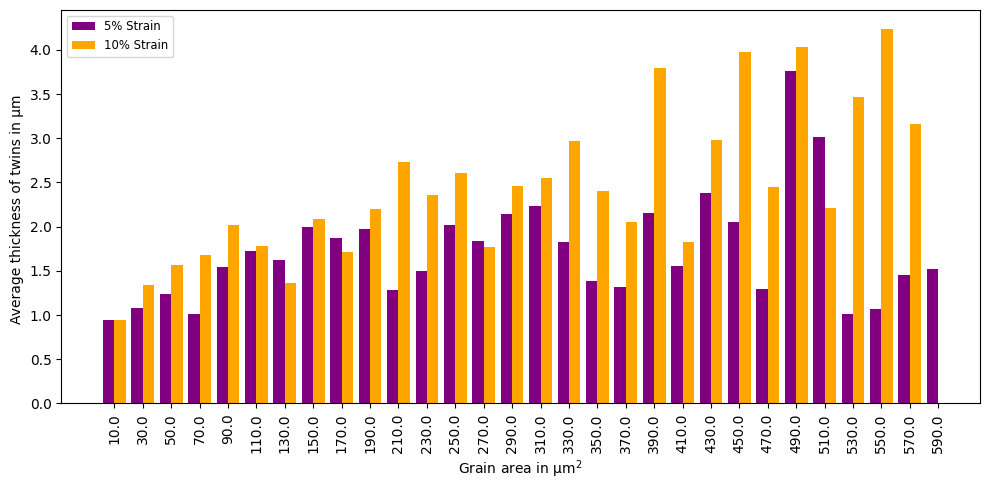

In [337]:
plt.figure(figsize=(10, 5))
X_axis = np.arange(len(gp_5pco['area_mean']))
gp_10pn = gp_10pco.drop(gp_10pco[gp_10pco['avg_twin_thk'] > 5].index)
X_axis2 = np.arange(len(gp_10pn['area_mean']))
plt.bar(X_axis - 0.2, gp_5pco['avg_twin_thk'], 0.4, color='purple', label = '5% Strain')
plt.bar(X_axis2 + 0.2, gp_10pn['avg_twin_thk'], 0.4, color='orange', label = '10% Strain')
plt.legend(fontsize='small')

plt.xticks(X_axis,gp_5pco['area_mean'], rotation=90 )

plt.ylabel('Average thickness of twins in μm ')
plt.xlabel('Grain area in μm$^2$')

plt.tight_layout()
plt.savefig('six.png')
plt.show()

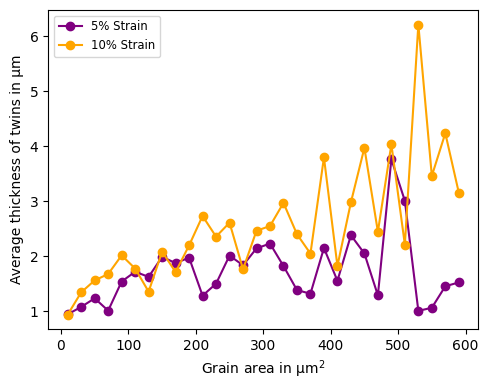

In [338]:
plt.figure(figsize=(5, 4))
plt.plot(gp_5pco['area_mean'], gp_5pco['avg_twin_thk'], marker='o', color='purple', label='5% Strain')
plt.plot(gp_10pco['area_mean'], gp_10pco['avg_twin_thk'], marker='o', color='orange', label='10% Strain')
plt.legend(fontsize='small')
plt.xlabel('Grain area in μm$^2$')
plt.ylabel('Average thickness of twins in μm')
plt.tight_layout()
plt.savefig('seven.png')
plt.show()

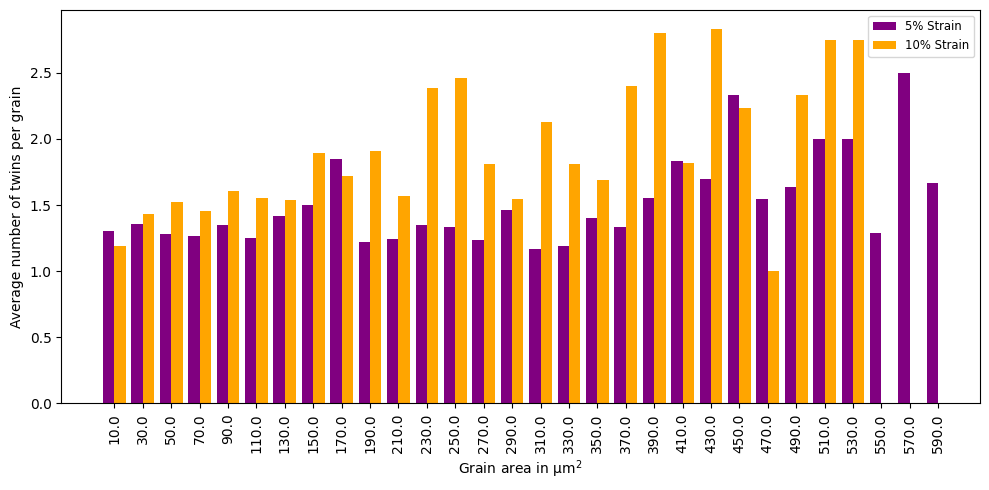

In [339]:
plt.figure(figsize=(10, 5))
X_axis = np.arange(len(gp_5pco['area_mean']))
gp_10ptn = gp_10pco.drop(gp_10pco[gp_10pco['avg_no_twins'] > 3].index)
X_axis2 = np.arange(len(gp_10ptn['area_mean']))

plt.bar(X_axis - 0.2, gp_5pco['avg_no_twins'], 0.4, color='purple', label = '5% Strain')
plt.bar(X_axis2 + 0.2, gp_10ptn['avg_no_twins'], 0.4, color='orange', label = '10% Strain')
plt.legend(fontsize='small')

plt.xticks(X_axis,gp_5pco['area_mean'], rotation=90 )
plt.ylabel('Average number of twins per grain')
plt.xlabel('Grain area in μm$^2$')

plt.tight_layout()
plt.savefig('eight.png')
plt.show()

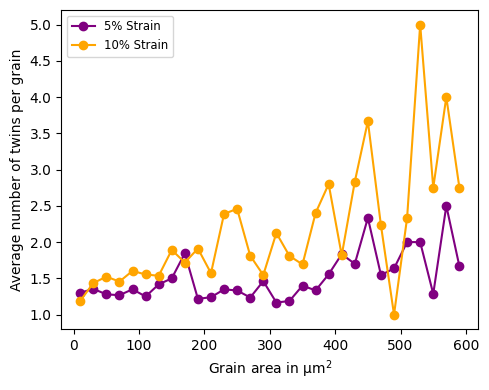

In [340]:
plt.figure(figsize=(5, 4))
plt.plot(gp_5pco['area_mean'], gp_5pco['avg_no_twins'], marker='o', color='purple', label='5% Strain')
plt.plot(gp_10pco['area_mean'], gp_10pco['avg_no_twins'], marker='o', color='orange', label='10% Strain')
plt.legend(fontsize='small')
plt.xlabel('Grain area in μm$^2$')
plt.ylabel('Average number of twins per grain')
plt.tight_layout()
plt.savefig('nine.png')
plt.show()

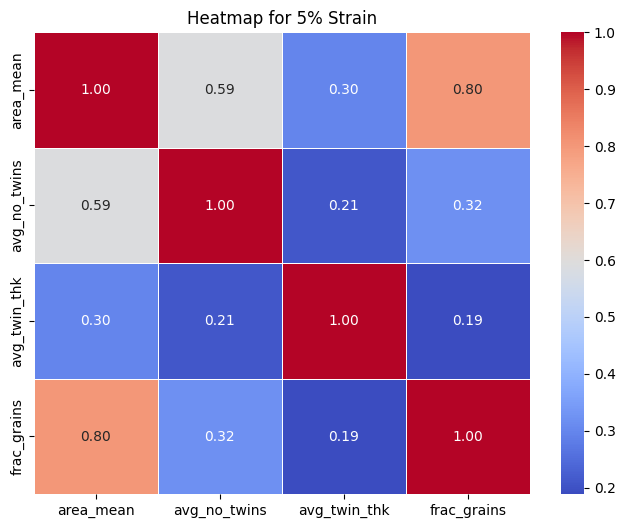

In [341]:
correlation_matrix = gp_5pco.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Heatmap for 5% Strain')
plt.savefig('ten.png')
plt.show()

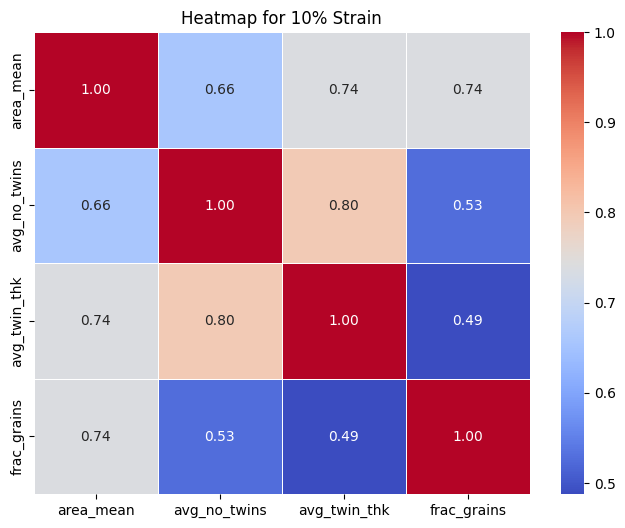

In [342]:
correlation_matrix = gp_10pco.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Heatmap for 10% Strain')
plt.savefig('eleven.png')
plt.show()

In [354]:
i = 1
def linear_regression(X, y, p, s=42):
  global i
  data = np.column_stack((X, y))
  def drop_outliers(data, threshold=3):
      mean = np.mean(data, axis=0)
      std = np.std(data, axis=0)
      z_scores = np.abs((data - mean) / std)
      filtered_data = data[(z_scores < threshold).all(axis=1)]
      return filtered_data
  filtered_data = drop_outliers(data)
  X_filtered, y_filtered = filtered_data[:, :-1], filtered_data[:, -1]
  X_train, X_test, y_train, y_test = train_test_split( X_filtered, y_filtered,  test_size = p, random_state = s)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  print(f'Mean Squared Error: {mse}')
  r_squared = lr.score(X_test, y_test)
  print(f'R-squared: {r_squared}')
  plt.scatter(X_train, y_train, color='red', label='Train data')
  plt.scatter(X_test, y_test, color='black', label='Test data')
  X_smooth = np.arange(min(X), max(X), 0.1).reshape(-1, 1)
  y_smooth_pred = lr.predict(X_smooth)
  plt.plot(X_smooth, y_smooth_pred, color='blue', linewidth=3, label='Linear Regression')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.title('Linear Regression')
  plt.legend()
  plt.savefig(f'lr{i}.png')
  i +=1
  plt.show()
  return lr

In [344]:
def overlapping_function(x,xmin, xmax):
    v = (2*(x-xmin) / (xmax - xmin)) - 1
    return 1 / (1 + np.exp(4*v / (1- v**2)))

def combine_predictions(pred1, pred2, x):
    xmin = min(x)
    xmax = max(x)
    combined_pred = []
    for i in range(len(x)):
      weight_1 = overlapping_function(x[i][0], xmin[0], xmax[0])
      weight_2 = 1 - weight_1
      combined_pred.append(weight_1 * pred1[i] + weight_2 * pred2[i])
    return np.array(combined_pred).reshape(-1, 1)

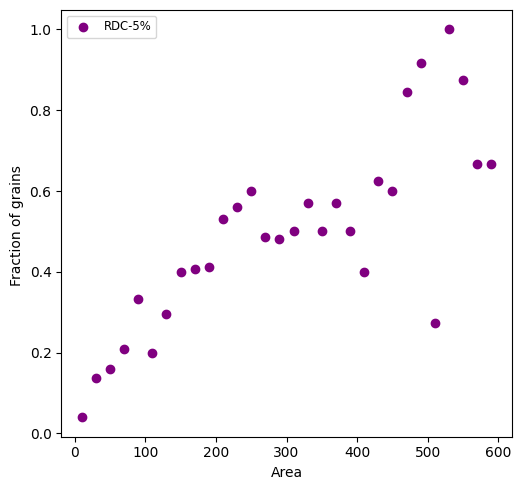

In [345]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(gp_5pco['area_mean'], gp_5pco['frac_grains'],label='RDC-5%',color='purple')
plt.ylabel('Fraction of grains ')
plt.xlabel('Area')
plt.legend(fontsize = 'small', loc='upper left')
plt.tight_layout()
plt.savefig('twelve.png')
plt.show()

In [346]:
X_f5 = np.array(gp_5pco['area_mean']).reshape(-1,1)
y_f5 = np.array(gp_5pco['frac_grains']).reshape(-1,1)

Mean Squared Error: 0.001998378173238225
R-squared: 0.927947302234484


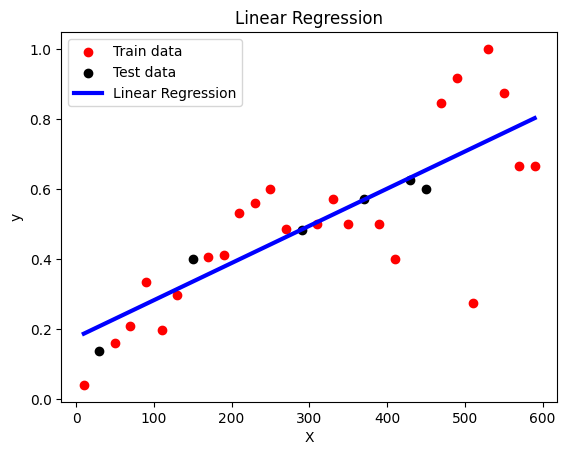

In [355]:
lr_frac_5p = linear_regression(X_f5, y_f5, 0.2, 12)

In [ ]:
X = 400
lr_frac_5p.predict(np.array(X).reshape(-1,1))

array([0.60052156])

In [ ]:
pickle.dump(lr_frac_5p, open('lr_frac_5p.pkl', 'wb'))

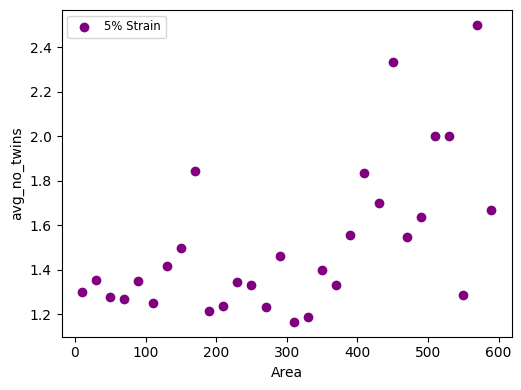

In [349]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(gp_5pco['area_mean'], gp_5pco['avg_no_twins'],label='5% Strain',color='purple')
plt.legend(fontsize = 'small', loc='upper left')
plt.ylabel('avg_no_twins')
plt.xlabel('Area')
plt.tight_layout()
plt.savefig('thirteen.png')
plt.show()

In [356]:
X_n5 = np.array(gp_5pco['area_mean']).reshape(-1,1)
y_n5 = np.array(gp_5pco['avg_no_twins']).reshape(-1,1)

Mean Squared Error: 0.016756973674062734
R-squared: 0.769481445597719


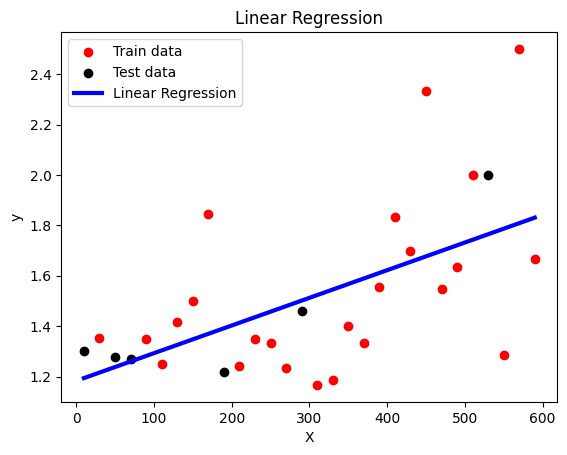

In [357]:
subset1_indices = np.where((X_n5[:, 0] <= 600),)[0]
subset1_X, subset1_y = X_n5[subset1_indices], y_n5[subset1_indices]
lr_at_5p = linear_regression( subset1_X, subset1_y, 0.2, 798)

In [ ]:
X = 400
predict = lr_at_5p.predict(np.array(X).reshape(-1, 1))
print(predict)

[1.62197635]


In [ ]:
pickle.dump(lr_at_5p, open('lr_at_5p.pkl', 'wb'))

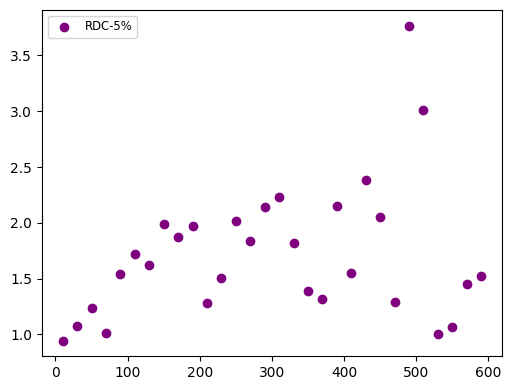

In [358]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(gp_5pco['area_mean'], gp_5pco['avg_twin_thk'],label='RDC-5%',color='purple')
plt.legend(fontsize = 'small', loc='upper left')
plt.tight_layout()
plt.savefig('fourteen.png')
plt.show()

In [359]:
X_t5 = np.array(gp_5pco['area_mean']).reshape(-1,1)
y_t5 = np.array(gp_5pco['avg_twin_thk']).reshape(-1,1)

Mean Squared Error: 0.017090361532249188
R-squared: 0.8442132092187934


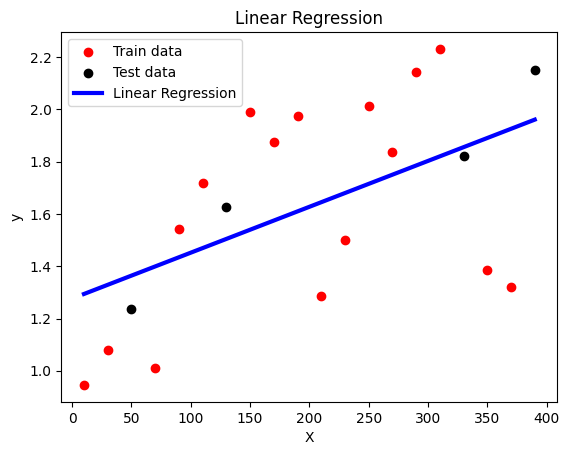

In [360]:
subset1_indices = np.where((X_t5[:, 0] <= 400),)[0]
subset1_X, subset1_y = X_t5[subset1_indices], y_t5[subset1_indices]
lr1_tt_5p = linear_regression( subset1_X, subset1_y, 0.2, 771)

Mean Squared Error: 0.0031230976130685274
R-squared: 0.9549596477741097


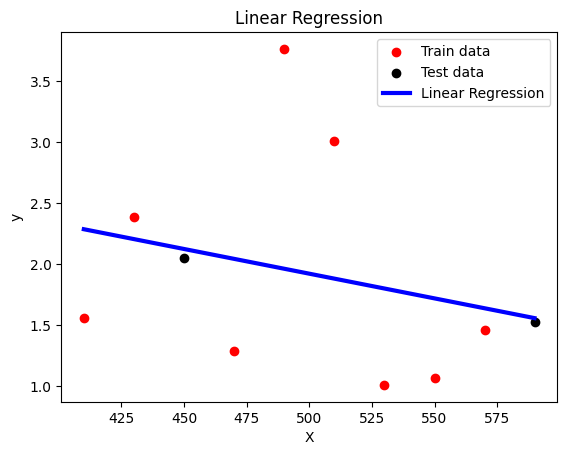

In [361]:
subset2_indices = np.where((400 < X_t5[:, 0]) & (X_t5[:, 0] <= 600))[0]
subset2_X, subset2_y = X_t5[subset2_indices], y_t5[subset2_indices]
lr2_tt_5p = linear_regression( subset2_X, subset2_y, 0.2, 28)

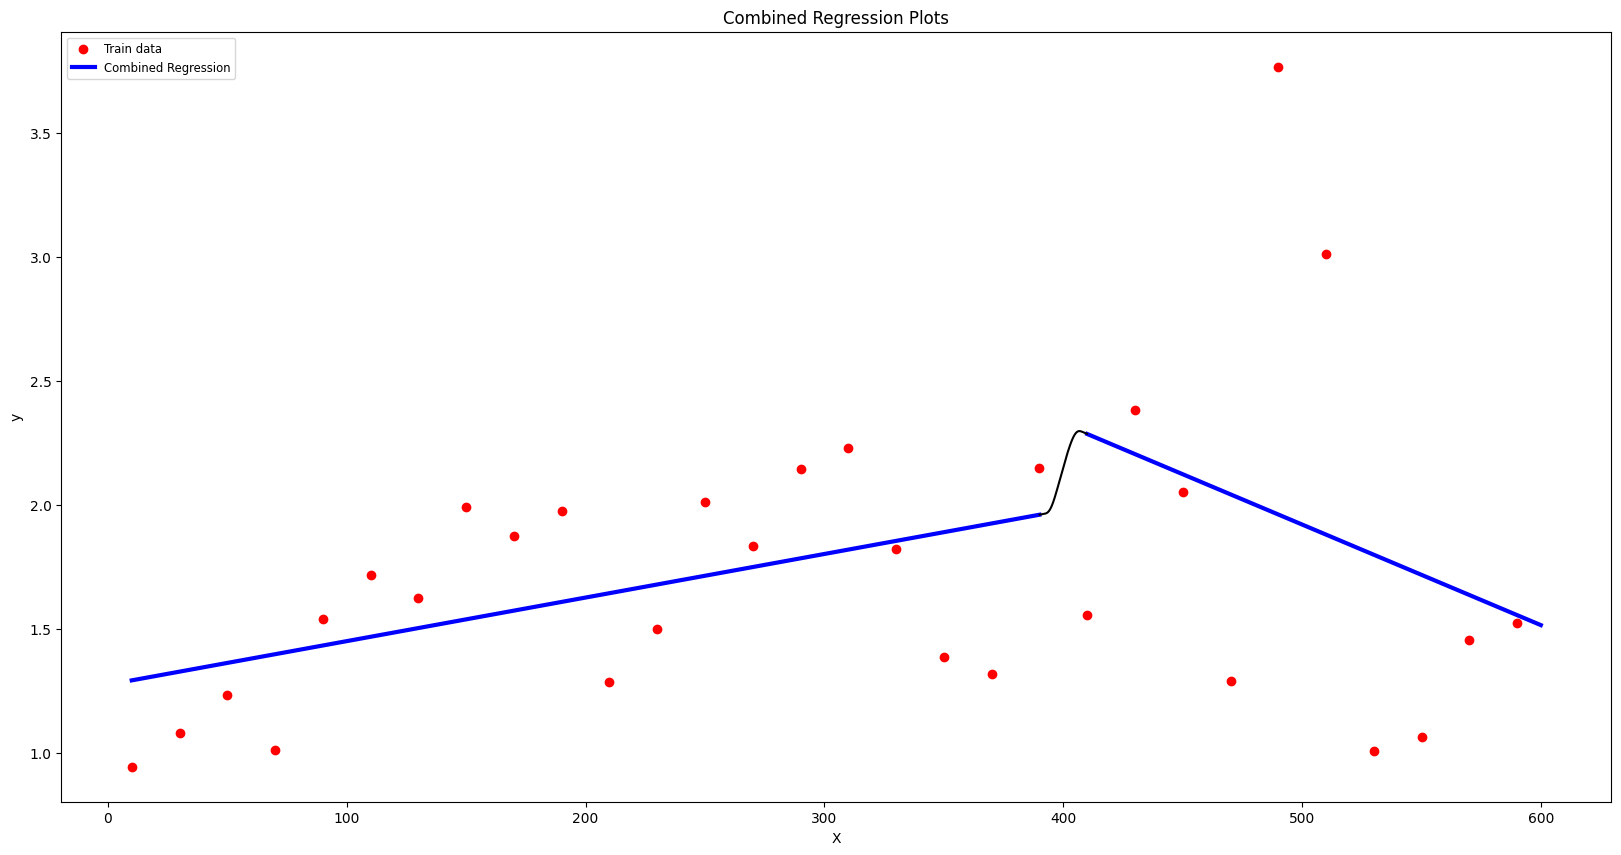

In [362]:
plt.figure(figsize =(20, 10))

#subset1
plt.scatter(subset1_X, subset1_y, color='red', label='Train data')
X_smooth1 = np.arange(min(subset1_X), 410, 0.1).reshape(-1, 1)
y_smooth_pred1 = lr1_tt_5p.predict(X_smooth1)
combined_lr1 = np.column_stack((X_smooth1, y_smooth_pred1))
combined_lr1_plot = combined_lr1[(combined_lr1[:, 0] <= 390)]
X_smooth1_plot = combined_lr1_plot[:, :-1]
y_smooth_pred1_plot = combined_lr1_plot[:, -1]
plt.plot(X_smooth1_plot, y_smooth_pred1_plot, color='blue', linewidth=3, label='Combined Regression')

#subset2
X_smooth2 = np.arange(390, 600, 0.1).reshape(-1, 1)
y_smooth_pred2 = lr2_tt_5p.predict(X_smooth2)
combined_lr2 = np.column_stack((X_smooth2, y_smooth_pred2))
combined_lr2_plot = combined_lr2[(combined_lr2[:, 0] >= 410) & (combined_lr2[:, 0] <= 600)]
X_smooth2_plot = combined_lr2_plot[:, :-1]
y_smooth_pred2_plot = combined_lr2_plot[:, -1]
plt.scatter(subset2_X, subset2_y, color='red')
plt.plot(X_smooth2_plot, y_smooth_pred2_plot, color='blue', linewidth=3 )
combined_lr1_overlap = combined_lr1[(combined_lr1[:, 0] >= 390) & (combined_lr1[:, 0] <= 410)]
X_smooth_lr1 = combined_lr1_overlap[:, :-1]
y_smooth_lr1 = combined_lr1_overlap[:, -1]
combined_lr2_overlap = combined_lr2[(combined_lr2[:, 0] >= 390) & (combined_lr2[:, 0] <= 410)]
X_smooth_lr2 = combined_lr2_overlap[:, :-1]
y_smooth_lr2 = combined_lr2_overlap[:, -1]
combined_pred1 = combine_predictions( y_smooth_lr1, y_smooth_lr2, X_smooth_lr1)
plt.plot(X_smooth_lr1, combined_pred1, color='black')

# Display plot and results
plt.legend(fontsize='small', loc='upper left')
# Combine Plots
plt.xlabel('X')
plt.ylabel('y')
plt.title('Combined Regression Plots')
plt.savefig('fifteen.png')

In [363]:
X = 400
if X <=390:
  predict = lr1_tt_5p.predict(np.array(X).reshape(-1, 1))
elif X>390 and X<=410:
  predict1 = lr1_tt_5p.predict(np.array(X).reshape(-1, 1))
  predict2 = lr2_tt_5p.predict(np.array(X).reshape(-1, 1))
  weight_1 = overlapping_function(X, 390, 410)
  weight_2 = 1 - weight_1
  predict =  weight_1 * predict1 + weight_2 * predict2
elif X>410 and X<=600:
  predict = lr2_tt_5p.predict(np.array(X).reshape(-1, 1))

print(predict)

[2.15283296]


In [364]:
pickle.dump(lr1_tt_5p, open('lr1_tt_5p.pkl', 'wb'))
pickle.dump(lr2_tt_5p, open('lr2_tt_5p.pkl', 'wb'))

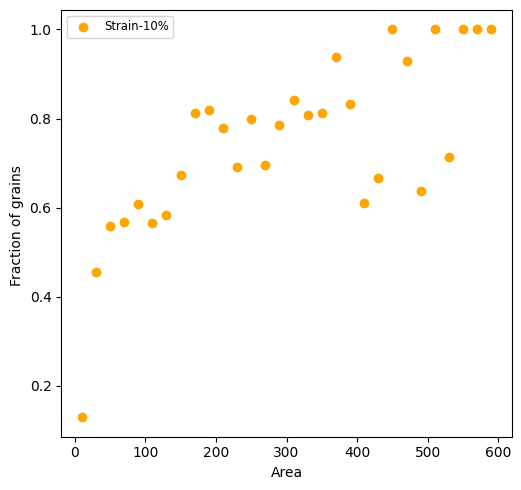

In [365]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(gp_10pco['area_mean'], gp_10pco['frac_grains'],label='Strain-10%',color='orange')
plt.ylabel('Fraction of grains ')
plt.xlabel('Area')
plt.legend(fontsize = 'small', loc='upper left')
plt.tight_layout()
plt.savefig('sixteen.png')
plt.show()

In [366]:
X_f10 = np.array(gp_10pco['area_mean']).reshape(-1,1)
y_f10 = np.array(gp_10pco['frac_grains']).reshape(-1,1)

Mean Squared Error: 0.002747969452953046
R-squared: 0.876558289856654


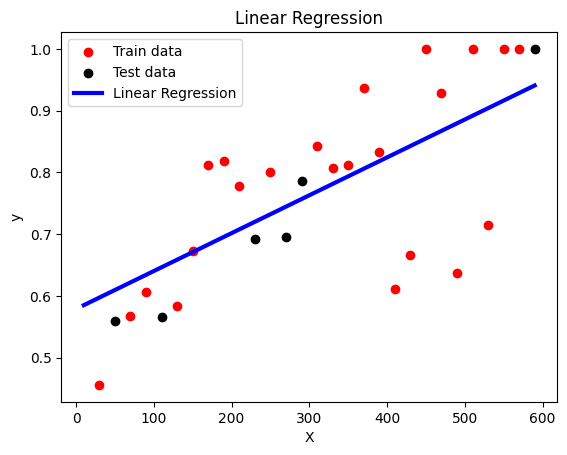

In [367]:
lr_frac_10p = linear_regression(X_f10, y_f10, 0.2, 20)

In [368]:
X = 400
lr_frac_10p.predict(np.array(X).reshape(-1, 1))

array([0.82432775])

In [369]:
pickle.dump(lr_frac_10p, open('lr_frac_10p.pkl', 'wb'))

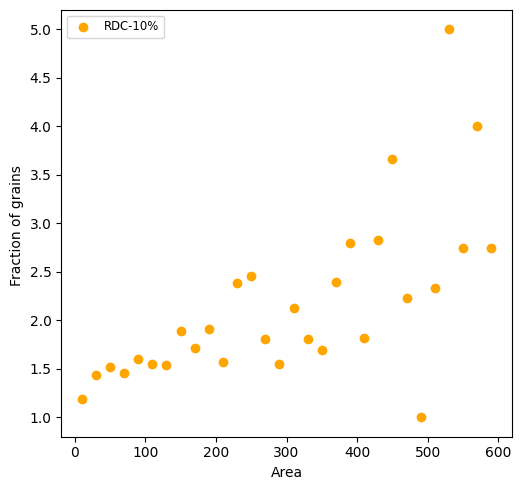

In [370]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(gp_10pco['area_mean'], gp_10pco['avg_no_twins'],label='RDC-10%',color='orange')
plt.ylabel('Fraction of grains ')
plt.xlabel('Area')
plt.legend(fontsize = 'small', loc='upper left')
plt.tight_layout()
plt.savefig('seventeen.png')
plt.show()

In [371]:
X_n10 = np.array(gp_10pco['area_mean']).reshape(-1,1)
y_n10 = np.array(gp_10pco['avg_no_twins']).reshape(-1,1)

Mean Squared Error: 0.013666316628429896
R-squared: 0.9652863975122106


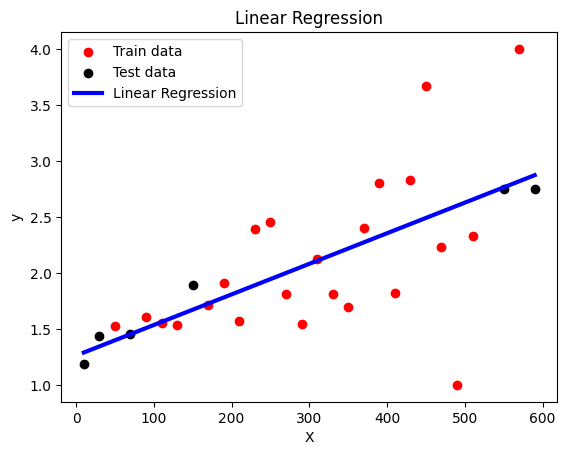

In [372]:
lr_at_10p = linear_regression(X_n10, y_n10, 0.2, 691)

In [373]:
X = 400
predict = lr_at_10p.predict(np.array(X).reshape(-1, 1))
print(predict)

[2.35415921]


In [374]:
pickle.dump(lr_at_10p, open('lr_at_10p.pkl', 'wb'))

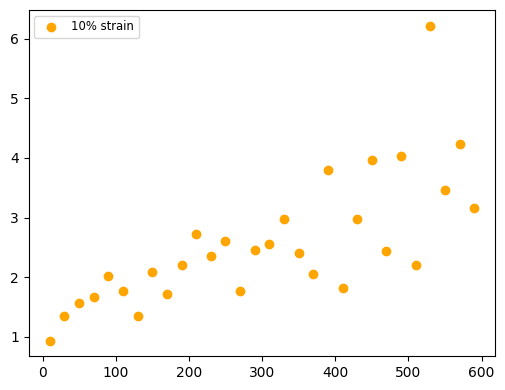

In [375]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(gp_10pco['area_mean'], gp_10pco['avg_twin_thk'],label='10% strain',color='orange')
plt.legend(fontsize = 'small', loc='upper left')
plt.tight_layout()
plt.savefig('eighteen.png')
plt.show()

In [376]:
X_t10 = np.array(gp_10pco['area_mean']).reshape(-1,1)
y_t10 = np.array(gp_10pco['avg_twin_thk']).reshape(-1,1)

Mean Squared Error: 0.029994914680038346
R-squared: 0.9242381886896566


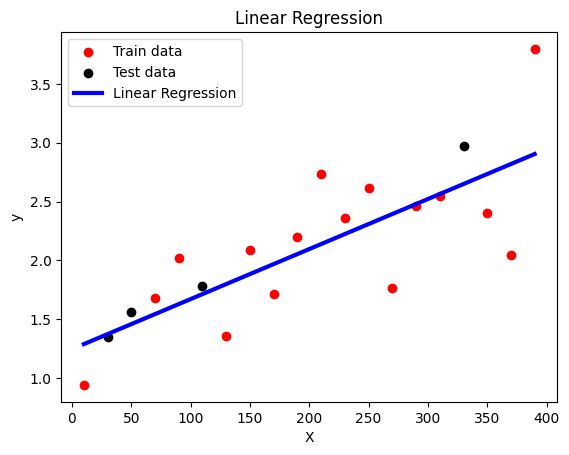

In [377]:
subset1_indices = np.where((X_t10[:, 0] <= 400),)[0]
subset1_X, subset1_y = X_t10[subset1_indices], y_t10[subset1_indices]
lr1_tt_10p = linear_regression(subset1_X, subset1_y, 0.2, 68)

Mean Squared Error: 0.040879517746921015
R-squared: 0.8964965656180418


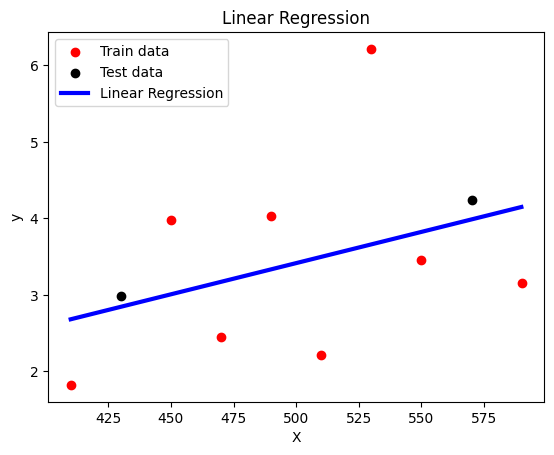

In [378]:
subset2_indices = np.where((400 < X_t5[:, 0]) & (X_t5[:, 0] <= 600))[0]
subset2_X, subset2_y = X_t10[subset2_indices], y_t10[subset2_indices]
lr2_tt_10p = linear_regression(subset2_X, subset2_y, 0.2, 90)

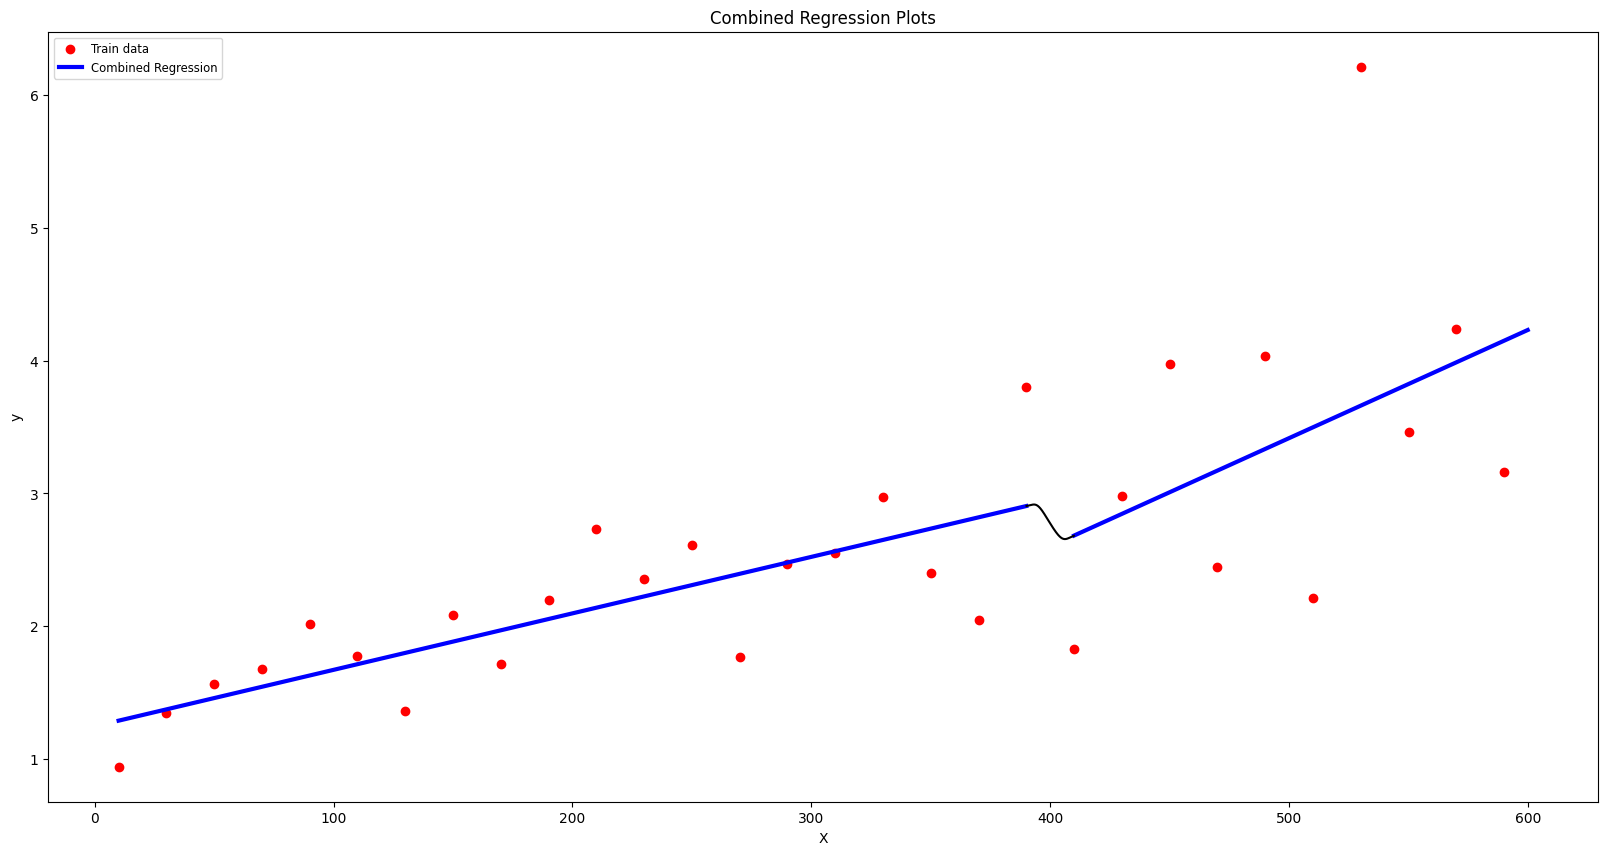

In [379]:
plt.figure(figsize =(20, 10))

#subset1
plt.scatter(subset1_X, subset1_y, color='red', label='Train data')
X_smooth1 = np.arange(min(subset1_X), 410, 0.1).reshape(-1, 1)
y_smooth_pred1 = lr1_tt_10p.predict(X_smooth1)
combined_lr1 = np.column_stack((X_smooth1, y_smooth_pred1))
combined_lr1_plot = combined_lr1[(combined_lr1[:, 0] <= 390)]
X_smooth1_plot = combined_lr1_plot[:, :-1]
y_smooth_pred1_plot = combined_lr1_plot[:, -1]
plt.plot(X_smooth1_plot, y_smooth_pred1_plot, color='blue', linewidth=3, label='Combined Regression')

#subset2
X_smooth2 = np.arange(390, 600, 0.1).reshape(-1, 1)
y_smooth_pred2 = lr2_tt_10p.predict(X_smooth2)
combined_lr2 = np.column_stack((X_smooth2, y_smooth_pred2))
combined_lr2_plot = combined_lr2[(combined_lr2[:, 0] >= 410) & (combined_lr2[:, 0] <= 600)]
X_smooth2_plot = combined_lr2_plot[:, :-1]
y_smooth_pred2_plot = combined_lr2_plot[:, -1]
plt.scatter(subset2_X, subset2_y, color='red')
plt.plot(X_smooth2_plot, y_smooth_pred2_plot, color='blue', linewidth=3 )
combined_lr1_overlap = combined_lr1[(combined_lr1[:, 0] >= 390) & (combined_lr1[:, 0] <= 410)]
X_smooth_lr1 = combined_lr1_overlap[:, :-1]
y_smooth_lr1 = combined_lr1_overlap[:, -1]
combined_lr2_overlap = combined_lr2[(combined_lr2[:, 0] >= 390) & (combined_lr2[:, 0] <= 410)]
X_smooth_lr2 = combined_lr2_overlap[:, :-1]
y_smooth_lr2 = combined_lr2_overlap[:, -1]
combined_pred1 = combine_predictions( y_smooth_lr1, y_smooth_lr2, X_smooth_lr1)
plt.plot(X_smooth_lr1, combined_pred1, color='black')

# Display plot and results
plt.legend(fontsize='small', loc='upper left')
# Combine Plots
plt.xlabel('X')
plt.ylabel('y')
plt.title('Combined Regression Plots')
plt.savefig('ninteen.png')

In [380]:
X = 300
if X <=290:
  predict = lr1_tt_10p.predict(np.array(X).reshape(-1, 1))
elif X>290 and X<=310:
  predict1 = lr1_tt_10p.predict(np.array(X).reshape(-1, 1))
  predict2 = lr2_tt_10p.predict(np.array(X).reshape(-1, 1))
  weight_1 = overlapping_function(X, 290, 310)
  weight_2 = 1 - weight_1
  predict =  weight_1 * predict1 + weight_2 * predict2
elif X>310 and X<=600:
  predict = lr2_tt_10p.predict(np.array(X).reshape(-1, 1))

print(predict)

[2.15324983]


In [381]:
pickle.dump(lr1_tt_10p, open('lr1_tt_10p.pkl', 'wb'))
pickle.dump(lr2_tt_10p, open('lr2_tt_10p.pkl', 'wb'))

In [382]:
interpolation_range = np.arange(1, 16)
def interpolation(a5, a10):
  l = []
  for i in range(1, 16):
    l.append(a5 + (a10 - a5) * ((i-5) / 5))
  return l

In [383]:
c_f5 = lr_frac_5p.intercept_
m_f5 = lr_frac_5p.coef_[0]
c_f10 = lr_frac_10p.intercept_
m_f10 = lr_frac_10p.coef_[0]

list_fm = interpolation(m_f5, m_f10)
list_fc = interpolation(c_f5, c_f10)

frac_ = pd.DataFrame()
frac_['strain'] = np.arange(1, 16)
frac_['a1'] = np.array(list_fm).reshape(-1,1)
frac_['a0'] = np.array(list_fc).reshape(-1,1)
print(frac_)

    strain        a1        a0
0        1  0.001421 -0.147095
1        2  0.001332 -0.066421
2        3  0.001242  0.014252
3        4  0.001152  0.094926
4        5  0.001062  0.175599
5        6  0.000973  0.256273
6        7  0.000883  0.336946
7        8  0.000793  0.417620
8        9  0.000703  0.498293
9       10  0.000613  0.578967
10      11  0.000524  0.659641
11      12  0.000434  0.740314
12      13  0.000344  0.820988
13      14  0.000254  0.901661
14      15  0.000164  0.982335


In [384]:
c_n5 = lr_at_5p.intercept_
m_n5 = lr_at_5p.coef_[0]
c_n10 = lr_at_10p.intercept_
m_n10 = lr_at_10p.coef_[0]
list_nm = interpolation(m_n5, m_n10)
list_nc = interpolation(c_n5, c_n10)

no_twins_ = pd.DataFrame()
no_twins_['strain'] = np.arange(1, 16)
no_twins_['a1'] = np.array(list_nm).reshape(-1,1)
no_twins_['a0'] = np.array(list_nc).reshape(-1,1)
print(no_twins_)

    strain        a1        a0
0        1 -0.000208  1.119433
1        2  0.000119  1.135267
2        3  0.000445  1.151100
3        4  0.000772  1.166933
4        5  0.001098  1.182767
5        6  0.001425  1.198600
6        7  0.001751  1.214434
7        8  0.002078  1.230267
8        9  0.002404  1.246101
9       10  0.002731  1.261934
10      11  0.003057  1.277768
11      12  0.003384  1.293601
12      13  0.003710  1.309435
13      14  0.004037  1.325268
14      15  0.004363  1.341102


In [385]:
#Area (0 - 400)
c_t5 = lr1_tt_5p.intercept_
m_t5 = lr1_tt_5p.coef_[0]
c_t10 = lr1_tt_10p.intercept_
m_t10 = lr1_tt_10p.coef_[0]
list_tm = interpolation(m_t5, m_t10)
list_tc = interpolation(c_t5, c_t10)

twin_thk1_ = pd.DataFrame()
twin_thk1_['strain'] = np.arange(1, 16)
twin_thk1_['a1'] = np.array(list_tm).reshape(-1,1)
twin_thk1_['a0'] = np.array(list_tc).reshape(-1,1)
print(twin_thk1_)

    strain        a1        a0
0        1 -0.000245  1.301665
1        2  0.000256  1.295314
2        3  0.000756  1.288963
3        4  0.001256  1.282611
4        5  0.001756  1.276260
5        6  0.002256  1.269908
6        7  0.002756  1.263557
7        8  0.003256  1.257206
8        9  0.003757  1.250854
9       10  0.004257  1.244503
10      11  0.004757  1.238152
11      12  0.005257  1.231800
12      13  0.005757  1.225449
13      14  0.006257  1.219098
14      15  0.006758  1.212746


In [386]:
#Area (400 - 600)
c_t5 = lr2_tt_5p.intercept_
m_t5 = lr2_tt_5p.coef_[0]
c_t10 = lr2_tt_10p.intercept_
m_t10 = lr2_tt_10p.coef_[0]
list_tm1 = interpolation(m_t5, m_t10)
list_tc = interpolation(c_t5, c_t10)

twin_thk2_ = pd.DataFrame()
twin_thk2_['strain'] = np.arange(1, 16)
twin_thk2_['a1'] = np.array(list_tm1).reshape(-1,1)
twin_thk2_['a0'] = np.array(list_tc).reshape(-1,1)
print(twin_thk2_)

    strain        a1        a0
0        1 -0.013825  7.637857
1        2 -0.011382  6.715627
2        3 -0.008940  5.793396
3        4 -0.006497  4.871166
4        5 -0.004055  3.948936
5        6 -0.001612  3.026705
6        7  0.000830  2.104475
7        8  0.003272  1.182245
8        9  0.005715  0.260014
9       10  0.008157 -0.662216
10      11  0.010600 -1.584447
11      12  0.013042 -2.506677
12      13  0.015484 -3.428907
13      14  0.017927 -4.351138
14      15  0.020369 -5.273368


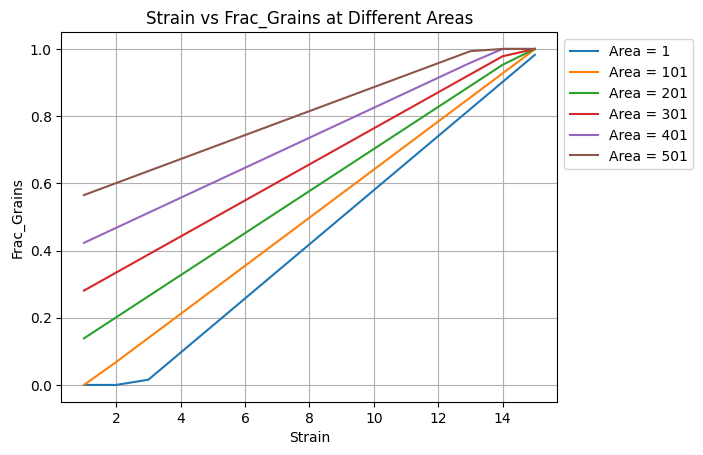

In [388]:
percentiles = np.arange(1, 16)

for area in range(1, 600, 100):
    frac_grains = frac_['a1'] * area + frac_['a0']
    plt.plot(percentiles, frac_grains.clip(0,1), label=f'Area = {area}')

plt.xlabel('Strain')
plt.ylabel('Frac_Grains')
plt.title('Strain vs Frac_Grains at Different Areas')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig('twenty.png')
plt.show()


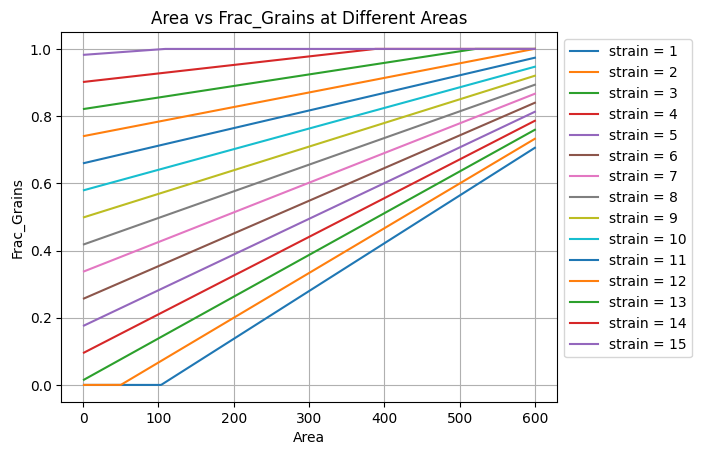

In [389]:
percentiles = np.arange(1, 16)
areas = np.arange(1, 601)

for percentile in range(1, 16):
    frac_grains = frac_.loc[frac_['strain'] == percentile, 'a1'].values * areas + frac_[frac_['strain'] == percentile]['a0'].values
    plt.plot(areas, frac_grains.clip(0,1), label=f'strain = {percentile}')

plt.xlabel('Area')
plt.ylabel('Frac_Grains')
plt.title('Area vs Frac_Grains at Different Areas')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig('twenty one.png')
plt.show()


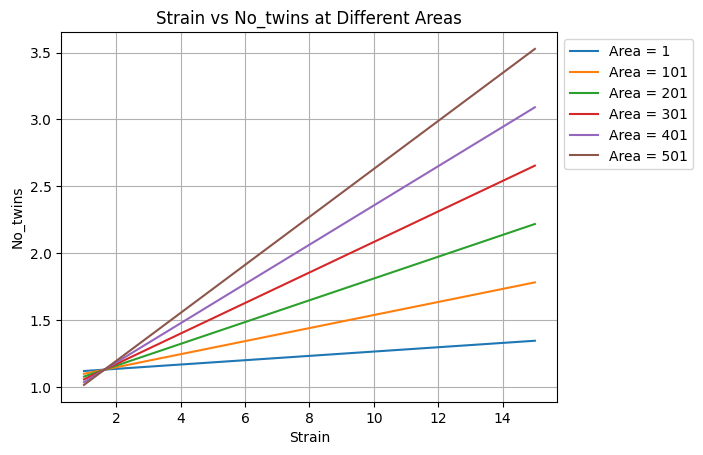

In [390]:
percentiles = np.arange(1, 16)

for area in range(1, 600, 100):
    no_twins = no_twins_['a1'] * area + no_twins_['a0']
    plt.plot(percentiles, no_twins, label=f'Area = {area}')

plt.xlabel('Strain')
plt.ylabel('No_twins')
plt.title('Strain vs No_twins at Different Areas')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig('twenty two.png')
plt.show()

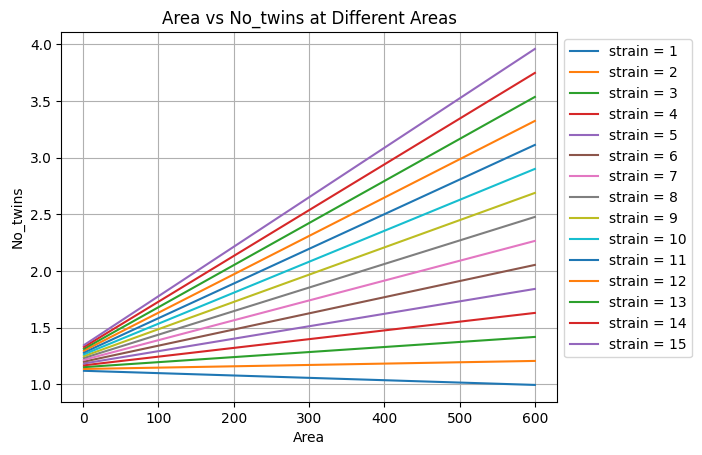

In [391]:
percentiles = np.arange(1, 16)
areas = np.arange(1, 601)

for percentile in range(1, 16):
    no_twins = no_twins_.loc[no_twins_['strain'] == percentile, 'a1'].values * areas + no_twins_[no_twins_['strain'] == percentile]['a0'].values
    plt.plot(areas, no_twins, label=f'strain = {percentile}')

plt.xlabel('Area')
plt.ylabel('No_twins')
plt.title('Area vs No_twins at Different Areas')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig('twenty three.png')
plt.show()


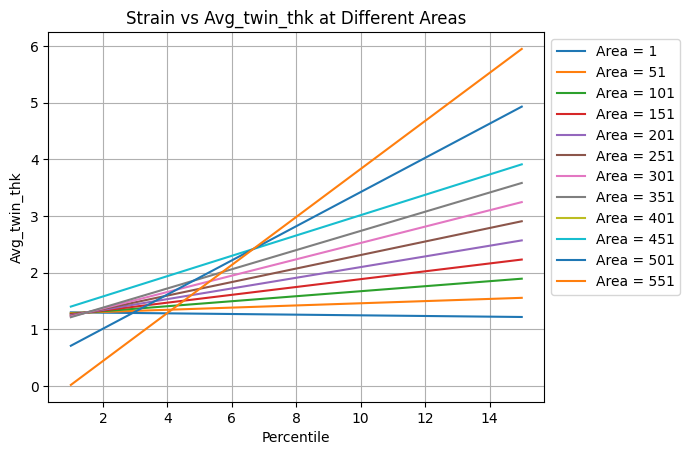

In [392]:
percentiles = np.arange(1, 16)

for area in range(1, 390, 50):
    twin_thk1 = twin_thk1_['a1'] * area + twin_thk1_['a0']
    plt.plot(percentiles, twin_thk1, label=f'Area = {area}')

areas = np.array(np.arange(391, 411, 100)).reshape(-1,1)
twin_thk11 = []
twin_thk22 = []
for area in range(401, 411, 50):
    twin_thk11.append(twin_thk1_['a1'] * area + twin_thk1_['a0'])
    twin_thk22.append(twin_thk2_['a1'] * area + twin_thk2_['a0'])
    twin_thk12 = combine_predictions(twin_thk11, twin_thk22, areas)
    plt.plot(percentiles, twin_thk12, label=f'Area = {area}')

for area in range(451, 601, 50):
    twin_thk2 = twin_thk2_['a1'] * area + twin_thk2_['a0']
    plt.plot(percentiles, twin_thk2.clip(0,), label=f'Area = {area}')

plt.xlabel('Percentile')
plt.ylabel('Avg_twin_thk')
plt.title('Strain vs Avg_twin_thk at Different Areas')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig('twenty four.png')
plt.show()

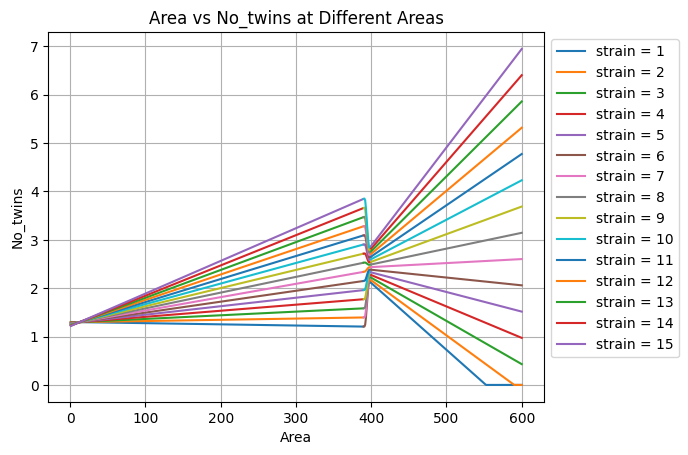

In [393]:
percentiles = np.arange(1, 16)
areas1 = np.arange(1, 390)
areas2 = np.arange(390, 400)
areas3 = np.arange(400, 601)
twin_thk11 = []
twin_thk22 = []

for percentile in range(1, 16):
    twin_thk1 = twin_thk1_.loc[twin_thk1_['strain'] == percentile, 'a1'].values * areas1 + twin_thk1_[twin_thk1_['strain'] == percentile]['a0'].values
    plt.plot(areas1, twin_thk1, label=f'strain = {percentile}')

for percentile in range(1, 16):
    twin_thk11 = twin_thk1_.loc[twin_thk1_['strain'] == percentile, 'a1'].values * areas2 + twin_thk1_[twin_thk1_['strain'] == percentile]['a0'].values
    twin_thk22 = twin_thk2_.loc[twin_thk2_['strain'] == percentile, 'a1'].values * areas2 + twin_thk2_[twin_thk2_['strain'] == percentile]['a0'].values
    twin_thk12 = combine_predictions(twin_thk11, twin_thk22, np.array(areas2).reshape(-1,1))
    plt.plot(areas2, twin_thk12)

for percentile in range(1, 16):
    twin_thk2 = twin_thk2_.loc[twin_thk2_['strain'] == percentile, 'a1'].values * areas3 + twin_thk2_[twin_thk2_['strain'] == percentile]['a0'].values
    plt.plot(areas3, twin_thk2.clip(0,))

plt.xlabel('Area')
plt.ylabel('No_twins')
plt.title('Area vs No_twins at Different Areas')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig('twenty five.png')
plt.show()
